<a href="https://colab.research.google.com/github/StefanoSassy/Intro-al-Gradiente-Descendente/blob/main/M%C3%A9todo_del_Gradiente_decendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método del Gradiente decendente y una introducción a redes neuronales.

Imaginemos la siguiente situación: le preguntamos a 23 personas que completen la frase "La vida es...". Una persona completo la frase con "una tómbola", 7 personas con "bella", 2 personas con "única", 6 personas con "fabulosa", 3 personas con "para vivirla" y 4 personas con "magía". Nos interesa saber que pasaría se le preguntamos a 1000 personas completar la frase. Para ello generaremos una red neuronal cuya manera de aprender será usando el método del gradiente descendente.

Antes de continuar preparemos los datos, la frase inicial de daremos el peso de 1, que corresponde a un 100% de probabilidad de ser dicha, como es lo esperado. Las respuestas las acomodamos como matriz [1,7,2,6,3,4] usando numpy, contamos el total de respuestas y con ella la probabilidad "real" de cada respueta. Usaremos los valores iniciales como peso y los normalizaremos con la función sigmoide.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (frase inicial con probabilidad 1)
x_input = np.array([1])

# Opciones de salida con frecuencias observadas (puedes modificar estos valores)
response_counts = np.array([1, 7, 2, 6, 3, 4])  # "una tómbola", "bella", "única", " fabulosa", "para vivirla", "magía"
total_responses = np.sum(response_counts)

# Pesos iniciales basados en frecuencias relativas
y_true = response_counts / total_responses  # Normalización para obtener probabilidades
weights_hidden = response_counts.astype(np.float32)  # Usamos los valores iniciales como pesos
bias_hidden = -1  # Sesgo


Aquí empieza la teoría y el cómo modelar la red neuronal.

Para las frases "una tómbola" y la frase "para vivirla". ¿Cómo se activan las neuronas de la siguiente capa? Para la neurona asociada a la frase "una tómbola" hacemos la siguiente composición de funciones $f(x)=wx+b$ y la función sigmoide $\sigma(x)=\frac{1}{1+e^{-x}}$, es decir,
$$(\sigma \circ f)(x)=\frac{1}{1+e^{-(wx+b)}}.$$
Supongamos que cada palabra u oración tiene un 100% de probabilidad de ser dicha, pues no podemos sospechar lo contrario, modificamos el sesgo (bias) $b=-1$, esto para que la frase que creemos que tiene la menor probabilidad de ser dicha active lo menos posible su neurona en la siguiente capa:
1. Para frase "una tómbola" tenemos: $(\sigma \circ f)(1)=\frac{1}{1+e^{-(1(1)-1)}}=\frac{1}{2}=0.5.$

2. Para la frase "para vivirla" tenemos: $(\sigma \circ f)(1)=\frac{1}{1+e^{-(3(1)-1)}}\approx 0.8808$.

En este caso la segunda frase tiene mas posibilidades de activar su neurona asociada que la primer frase.

<p align="center">
  <img src="https://github.com/StefanoSassy/Intro-al-Gradiente-Descendente/blob/87f1e51fda5419763c52675811c730388c824074/Imagenes_GD/red.jpg?raw=true" width="600">
</p>

In [ ]:
# Función sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

Para entender el descenso del gradiente necesitamos entender la derivada de una función primero en una dimensión para poco a poco generalizarlo a mas dimensiones. Si tenemos una función $f:Ω⊆ \mathbb{R} \rightarrow \mathbb{R}$, la derivada en un punto $x_0 \in Ω$ es el valor de la pendiente de la recta tangente a $f$ en $x_0$, es decir, $y=f'(x_0)x+b$. Recordemos que dada la ecuación general de una recta $\ell: Ax+By+C=0$, el vector ortogonal a la recta es $n=(A,B)$. Así, en nuestra recta tangente el vector ortogonal es $n=(f'(x_0), -1)$, lo que hace al vector de dirección de la recta $v=(1,f'(x_0))$.

Aquí tenenmos una observación importante, el vector $v$ siempre apuntará a la dirección positiva del eje $x$, el valor de la derivada es quien moverá al vector dependiendo del valor de la pendiente.

<p align="center">
  <img src="https://github.com/StefanoSassy/Intro-al-Gradiente-Descendente/blob/main/vector_derivada.jpg?raw=true" width="600">
</p>

¿Cómo se generaliza esta idea "direccional" en mas dimensiones?
Para una función $f: \Omega \subseteq \mathbb{R}^2 \rightarrow \mathbb{R}$, dada por $\bar{x}=(x,y) \mapsto z=f(x,y)$, necesitamos dos conceptos
1. Las derivadas parciales
$$\frac{\partial f}{\partial x}:=\lim_{h \to 0}\frac{f(\bar{x}+e_1h)-f(\bar{x})}{h}.$$

$$\frac{\partial f}{\partial y}:=\lim_{h \to 0}\frac{f(\bar{x}+e_2h)-f(\bar{x})}{h}.$$

Notemos que $\bar{x}-e_1h=(x,y)-(1,0)h=(x+h,y)$ y $\bar{x}-e_2h=(x,y)-(0,1)h=(x,y+h)$.

2. El gradiente de $f$ en un punto $\bar{x}_0=(x_0,y_0)$, definido por
$$\nabla f (x_0,y_0):=\frac{\partial f}{\partial x}(x_0,y_0) e_1+\frac{\partial f}{\partial y}(x_0,y_0) e_2:=\bigg(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}\bigg)\bigg|_{(x_0,y_0)}.$$

Todas estas fórmulas las podemos interpretar usando el ejemplo de la primer dimensión como sigue: la gráfica de la función $f$ representa una superficie, entonces, en el punto $(x_0,y_0)$ al tomar el límite de la primer derivada parcial obtenemos $(x_0+h,y_0)$, esto quiere decir que la segunda coordenada se queda fija, y la primer coordenada varia dependiendo el valor de $h$, entonces si consideramos el plano $y=y_0$ obtenemos un corte de nivel con la gráfica y dicho plano lo cual genera una curva plana. Y en esta curva plana hacemos el análisis de una dimensión.

<p align="center">
  <img src="https://github.com/StefanoSassy/Intro-al-Gradiente-Descendente/blob/37c8ac90659336b90529eea4e23f455c7268bb2b/Imagenes_GD/vec_grad.jpg?raw=true" width="600">
</p>

Las parciales son la proyección del vector de dirección de la recta tangente a la curva generada por el corte sobre el plano $xy$ en el punto $(x_0,y_0)$. El gradiente es la suma de dichos vectores en el plano $xy$.
<p align="center">
  <img src="https://github.com/StefanoSassy/Intro-al-Gradiente-Descendente/blob/4b20ef0ee3de086112622d857113ceaabf565012/Imagenes_GD/cortes.jpg?raw=true" width="600">
</p>

Esto si para cada punto $(x_0,y_0)$ generamos el vector gradiente $∇f$, obtenemos un nuevo concepto que es el *campo gradiente* que es un campo vectorial $F:Ω\subseteq \mathbb{R}^2\rightarrow \mathbb{R}^2$, es decir, una función vectorial de variable vectorial. ¿Cómo se grafica el campo gradiente?

Para ejemplificar tomemos la función $f:\mathbb{R}^2\rightarrow \mathbb{R}$ dada por $f(x,y)=x^2+y^2$ que es un paraboloide de revolución. Entonces
$$∇f(x,y)=\bigg(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}\bigg)=(2x,2y).$$ Para los puntos específicos $(1,0)$, $(0,1)$, $(-1,0)$ y $(0,-1)$ obtenemos los vectores $\nabla f(1,0)=(2,0)$, $\nabla f(0,1)=(0,2)$, $\nabla f(-1,0)=(-2,0)$ y $\nabla f(0,-1)=(0,-2)$. Por ejemplo para $(1,0)$ dibujamos un vector con origen $(1,0)$ y dirección $(2,0)$. Que resulta en la siguiente figura:

<p align="center">
  <img src="https://github.com/StefanoSassy/Intro-al-Gradiente-Descendente/blob/fbe67b9c32f0883b47add685d9dd210004045462/Imagenes_GD/campog.jpg?raw=true" width="600">
</p>

Notemos que para cada punto $(x,y)$ dibujaremos un vector en la misma dirección pero con el doble de "magnitud", también podemos notar que las direcciones tienden a "alejarse" de valor mínimo de la función.

In [ ]:
# Parámetros de entrenamiento
learning_rate = 0.1
iterations = 1000
mse_history = []

##El método.
En redes nerunales existen los *parametros de entrenamiento*, los cuales son cantidades que nos ayudan a buscar el mejor entrenamiento. Las siguientes ideas son las definiciones de estos parámetros.

Ya que entendimos geométricamente el gradiente veamos como se aplica al *método descendente*. Para ello necesitamos el concepto de derivada direccional, que está definida como

$$D_uf:=∇f\cdot u, \quad \text{con}\,\,\,||u||=1.$$

¿Cuál es la dirección en donde la derivada direccional alcanza su máximo?

Recordemos que el producto interno de dos vectores esta relacionado con el coseno de la siguiente manera:

$$ D_uf:=∇f\cdot u = ||∇f||\, ||u|| \cos \theta,$$

donde $\theta \in [0,2\pi)$ es el ángulo entre $u$ y $∇f$ en sentido antihorario, sabemos que el coseno alcanza su máximo en $\theta=0$, es decir, cuando $u$ tiene la misma dirección que el gradiente, como por definición $||u||=1$, se sigue que
$$D_uf=||∇f||,$$

es decir, $u=\nabla f/||\nabla f||$, usando máximos de funciones: $$\arg \max_{||\bullet||}(D_{\bullet}f)=\frac{∇f}{||\nabla f||}.$$

es la magnitud máxima que puede tomar la derivada direccional.

El método del gradiente descendente busca la dirección mínima, es decir,

$$-∇f \quad \text{o} \quad \arg \min_{||\bullet||}(D_{\bullet}f)=\frac{-\nabla f}{||\nabla f||}.$$

**Un método descendente** es de la forma
$$x_{k+1}=x_{k}+\alpha_{k}p_k,$$
donde $k$ son la *iteraciones* y $\alpha_{k}$ la *tasa de aprendizaje*. Para una función, por ejemplo la función *MSE* (error cuadrático medio), una dirección $v$ es descendente en $\bar{x}$ si
$$f(\bar{x}+tv)<f(\bar{x}).$$

**Proposición.-** Si $f$ es continuamente diferenciable (en una vecindad $Ω$ de $\bar{x}$), entonces cualquier dirección $v$ tal que $∇f\cdot v=:D_vf<0$ es una dirección descendente.

Ya vimos que la dirección donde la derivada direccional alcanza su mínimo es $-∇f/||∇ f||$, así el algoritmo descendente que buscamos es el siguiente:

$$\bar{x}_{k+1}=\bar{x}_k-\alpha_k ∇f(\bar{x}_k),$$

donde $\alpha_k$ es lo sufiecientemente pequeña para que $f(\bar{x}_{k+1})<f(\bar{x}_k)$. Este algoritmo es llamado **el método del gradiente descendente**.


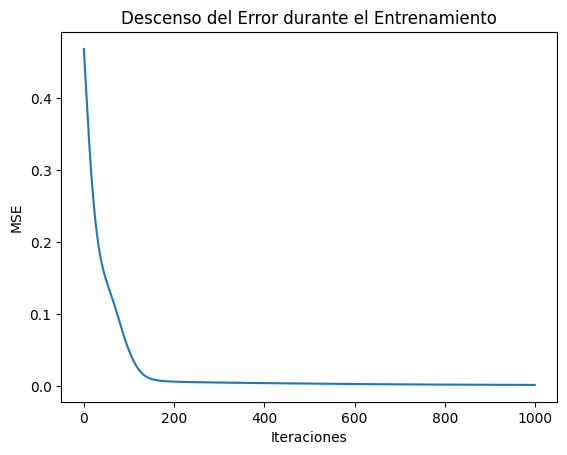

Pesos finales: [0.7847621 4.6964293 1.7183349 4.4911833 2.9113548 3.9182107]
Sesgo final: -5.4797257171392975


In [ ]:


# Entrenamiento con gradiente descendente
for _ in range(iterations):
    # Cálculo de la salida de la capa oculta
    z_hidden = weights_hidden * x_input + bias_hidden
    a_hidden = sigmoid(z_hidden)

    # Cálculo del error
    error = y_true - a_hidden
    mse = np.mean(error ** 2)
    mse_history.append(mse)

    # Backpropagation (ajuste de pesos)
    gradient = 2*error * sigmoid_derivative(z_hidden)
    weights_hidden += learning_rate * gradient * x_input
    bias_hidden += learning_rate * np.sum(gradient)

# Visualización del error
plt.plot(mse_history)
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Descenso del Error durante el Entrenamiento')
plt.show()

# Resultados finales
print("Pesos finales:", weights_hidden)
print("Sesgo final:", bias_hidden)